In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_finance import candlestick_ohlc

import matplotlib.dates as mdates
import datetime as dt
from datetime import date, timedelta
from datetime import timedelta, datetime

from scipy.stats import linregress

import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [6]:
df = pd.read_csv('./data/BTC-USD.csv',sep=',', date_parser=True)
df.drop('Adj Close', inplace = True, axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [7]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-06-07,35835.265625,36790.570313,33480.640625,33560.707031,3.368394e+10
2021-06-08,33589.519531,34017.386719,31114.443359,33472.632813,4.990205e+10
2021-06-09,33416.976563,37537.371094,32475.865234,37345.121094,5.397292e+10
2021-06-10,37389.515625,38334.324219,35847.593750,36702.597656,4.357603e+10
2021-06-11,36485.035156,37548.804688,36088.992188,37486.933594,4.141848e+10


# Long term - rok (zał: dziś jest 2019-05-05)

In [8]:
End = '2019-02-15'

In [9]:
End = pd.to_datetime(End)
Start = (End - timedelta(days=365))
df1 = df.loc[Start:End]
df1.index = df1.index.map(mdates.date2num)

In [10]:
Min_pozycja = df1['Low'].argmin()
Max_pozycja = df1['High'].argmax()

if Min_pozycja > Max_pozycja:
    Max_idx = df1.iloc[Min_pozycja].name
    Ax = df1.iloc[Max_pozycja].name
    Ay = df1['High'].loc[Ax]
    A = [Ax, Ay]

    df1a = df1[:Max_idx]
    while len(df1a)>2:
        slope, intercept, r_value, p_value, std_err = linregress(x=df1a.index, y=df1a['High'])
        df1a = df1a.loc[df1a['High'] > slope * df1a.index + intercept]

    Bx = df1a.index.max()
    By = df1a['High'].loc[Bx]
    B = [Bx, By]

    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    Cx = df1a.index.max() + 90
    Cy = a*Cx +b
    C = [Cx, Cy]
    
    X_long = [Ax, Cx]
    Y_long = [Ay, Cy]
    
else:

    Max_idx = df1.iloc[Max_pozycja].name
    Ax = df1.iloc[Min_pozycja].name
    Ay = df1['Low'].loc[Ax]
    A = [Ax, Ay]
    df1a = df1[:Max_idx]
    while len(df1a)>2:
        slope, intercept, r_value, p_value, std_err = linregress(x=df1a.index, y=df1a['Low'])
        df1a = df1a.loc[df1a['Low'] < slope * df1a.index + intercept]

    Bx = df1a.index.min()
    By = df1a['Low'].loc[Bx]
    B = [Bx, By]

    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    Cx = df1a.index.max() +90
    Cy = a*Cx +b
    C = [Cx, Cy]

    X_long = [Ax, Cx]
    Y_long = [Ay, Cy]

# Trend średni 5 ms. (Zał: dziś jest 19-05-05)

In [111]:
Start2 = (End - timedelta(days=180))
df2 = df.loc[Start2:End]
df2.index = df2.index.map(mdates.date2num)

In [112]:
Min_pozycja = df2['Low'].argmin()
Max_pozycja = df2['High'].argmax()

if Min_pozycja > Max_pozycja:
    Max_idx = df2.iloc[Min_pozycja].name
    Ax = df2.iloc[Max_pozycja].name
    Ay = df2['High'].loc[Ax]
    A = [Ax, Ay]

    df2a = df2[:Max_idx]
    while len(df2a)>2:
        slope, intercept, r_value, p_value, std_err = linregress(x=df2a.index, y=df2a['High'])
        df2a = df2a.loc[df2a['High'] > slope * df2a.index + intercept]

    Bx = df2a.index.max()
    By = df2a['High'].loc[Bx]
    B = [Bx, By]

    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    Cx = df2a.index.max() + 10
    Cy = a*Cx +b
    C = [Cx, Cy]

    X_mid = [Ax, Cx]
    Y_mid = [Ay, Cy]
    

    for i in range((A[0]-1).astype(int),Max_idx.astype(int)):
        df21 = df2[A[0]:Max_idx]
        df21['Pozycja na LT'] = df21.index * a + b
        df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
        good = df21['check'][df21['check']<=0].count()
        sum = len(df21['check'])

        if good == sum and a<=0:
            print(f'Najwyższy punkt został osiągnięty jako pierwszy i nie przecina ceny. Jego pozycja to: {Max_pozycja}')
            print(f'Trend spadkowy. Punkt A : {A}, punkt C: {C}')
            break
        else:
            Max_pozycja = df21['High'].argmax()+1

            Max_idx = df2.iloc[Min_pozycja].name
            Ax = df21.iloc[Max_pozycja].name
            Ay = df21['High'].loc[Ax]
            A = [Ax, Ay]

            df21a = df21
            while len(df21a)>2:
                slope, intercept, r_value, p_value, std_err = linregress(x=df21a.index, y=df21a['High'])
                df21a = df21a.loc[df21a['High'] > slope * df21a.index + intercept]

                Bx = df21a.index.max()
                By = df21a['High'].loc[Bx]
                B = [Bx, By]

                a = (Ay-By)/(Ax-Bx)
                b = By - a*Bx

                Cx = df2a.index.max() + 10
                Cy = a*Cx +b
                C = [Cx, Cy]

                X_mid = [Ax, Cx]
                Y_mid = [Ay, Cy]

else:

    Min_pozycja = df2['Low'].argmin()
    Max_pozycja = df2['High'].argmax()

    Max_idx = df2.iloc[Max_pozycja].name
    Ax = df2.iloc[Min_pozycja].name
    Ay = df2['Low'].loc[Ax]
    A = [Ax, Ay]
    df2a = df2[:Max_idx]
    while len(df2a)>2:
        slope, intercept, r_value, p_value, std_err = linregress(x=df2a.index, y=df2a['Low'])
        df2a = df2a.loc[df2a['Low'] < slope * df2a.index + intercept]

    Bx = df2a.index.min()
    By = df2a['Low'].loc[Bx]
    B = [Bx, By]

    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    Cx = df2a.index.max() +10
    Cy = a*Cx +b
    C = [Cx, Cy]

    X_mid = [Ax, Cx]
    Y_mid = [Ay, Cy]
    
    for i in range((A[0]-1).astype(int),Max_idx.astype(int)):
        df21 = df2[A[0]:Max_idx]
        df21['Pozycja na LT'] = df21.index * a + b
        df21['check']= round(df21['Low'] - df21['Pozycja na LT'],0)
        good = df21['check'][df21['check']>=0].count()
        sum = len(df21['check'])

        if good == sum and a>=0:
            print(f'Najniższy punkt został osiągnięty jako pierwszy i nie przecina ceny. Jego pozycja to: {Min_pozycja}')
            print(f'Trend Wzrostowy. Punkt A : {A}, punkt C: {C}')
            break

        else:
            Min_pozycja = df21['Low'].argmin()+1

            Max_idx = df2.iloc[Max_pozycja].name
            Ax = df21.iloc[Min_pozycja].name
            Ay = df21['Low'].loc[Ax]
            A = [Ax, Ay]

            df21a = df21
            while len(df2a)>2:
                slope, intercept, r_value, p_value, std_err = linregress(x=df2a.index, y=df2a['Low'])
                df2a = df2a.loc[df2a['Low'] < slope * df2a.index + intercept]

            Bx = df2a.index.max()
            By = df2a['Low'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx

            Cx = df2a.index.max() + 10
            Cy = a*Cx +b
            C = [Cx, Cy]

            X_mid = [Ax, Cx]
            Y_mid = [Ay, Cy]

KeyError: nan

In [ ]:
if Min_pozycja > Max_pozycja:
    
    print('ok')
    
else:
    Max_idx = df1.iloc[Max_pozycja].name
    Ax = df1.iloc[Min_pozycja].name
    Ay = df1['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df1.iloc[Min_pozycja].name
    By = df1['Low'].loc[Bx]
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df11=df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a + b
    df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']>=0].count()
    sum = len(df11['check'])
    
    for i in range(len(df11)):
        df11=df1[B[0]+1:Max_idx]
        Bx = df11.iloc[0].name
        By = df11['Low'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df11['Pozycja na LT'] = df11.index * a + b
        df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']>=0].count()
        sum = len(df11['check'])

        if good == sum:
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu wzrostowego')
            print(f'Punkt A:{A}, Punkt C: {C}')
            break
        else:
            df11=df1[B[0]+1:Max_idx]
            Bx = df11.iloc[0].name
            By = df11['Low'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
                
            Cx = df1.index.max() -100
            Cy = a*Cx +b
            C = [Cx, Cy]

            X_long = [Ax, Cx]
            Y_long = [Ay, Cy]

# Trend krótki 30 dni. (Zał: dziś jest 2019-05-05)

In [113]:
End = pd.to_datetime(End)
Start4 = (End - timedelta(days=415))
dfs = df.loc[Start4:End]

dfs['Mean-O/C'] = (dfs['Open'] + dfs['Close'])/2

dfs['EWM-280'] = dfs['Mean-O/C'].ewm(span=280).mean()

dfs['SMA-50'] = dfs['Mean-O/C'].rolling(window=50).mean()

# Po dokonaniu obliczeń wracamy do analizowanego okresu i zmieniamy format daty

dfs = dfs.loc[Start:End]
dfs.index =dfs.index.map(mdates.date2num)

In [114]:
df1.reset_index(inplace = True)
#df2.reset_index(inplace = True)
#df3.reset_index(inplace = True)
dfs.reset_index(inplace = True)

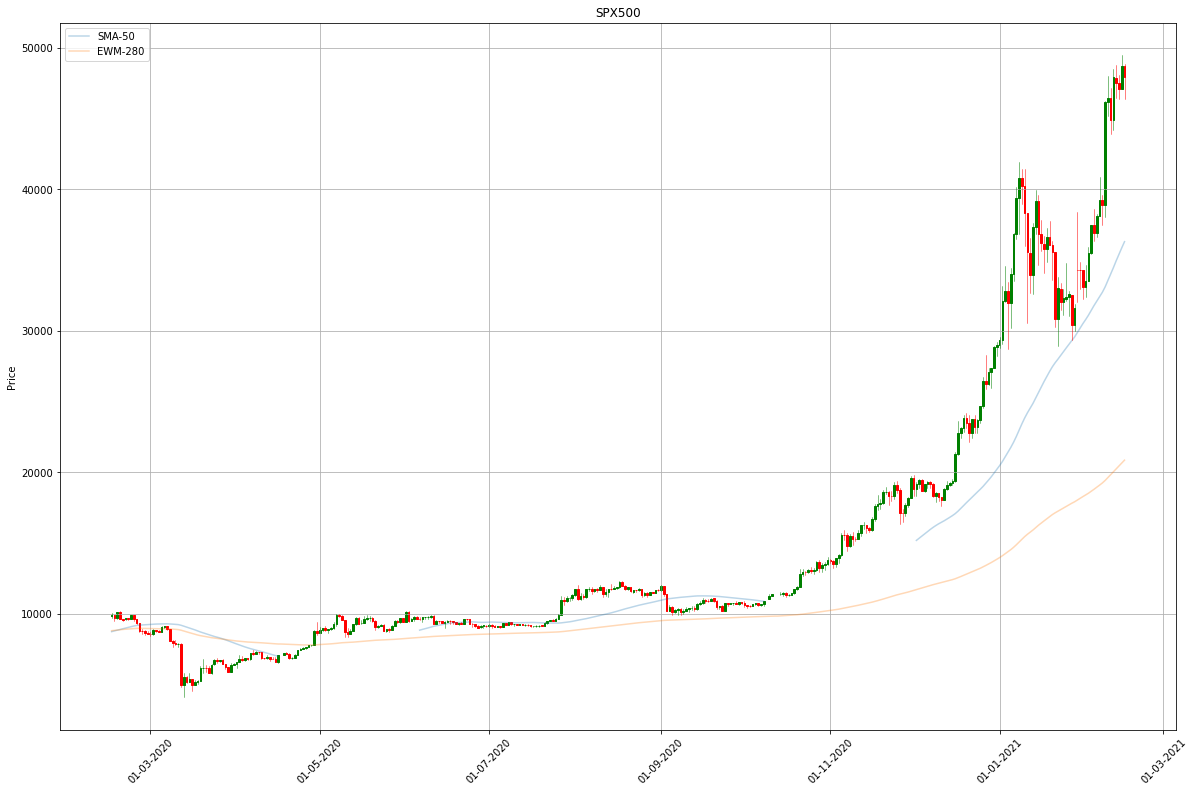

In [115]:
fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(111)
#ax3 = fig.add_subplot(111)
#ax4 = fig.add_subplot(111)
ax5 = fig.add_subplot(111)
ax6 = fig.add_subplot(111)

ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax2.plot(X_long, Y_long, label='Trend Line - Long', alpha = 0.7)
#ax3.plot(X_mid, Y_mid, label='Trend Line-  Short', alpha = 0.7)
#ax4.plot(X_shrt, Y_shrt, label='Trend Line-  Short', alpha = 0.7)
ax5.plot(dfs['index'], dfs['SMA-50'], label='SMA-50', alpha = 0.3)
ax6.plot(dfs['index'], dfs['EWM-280'], label='EWM-280', alpha = 0.3)



plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
plt.show()

In [93]:
df1a

,Open,High,Low,Close,Volume


In [353]:
df1

,index,Open,High,Low,Close,Volume
0,17836.0,6318.140137,6547.140137,6311.830078,6377.779785,3.789400e+09
1,17837.0,6378.919922,6396.859863,6327.379883,6388.439941,4.234870e+09
2,17838.0,6387.240234,6400.069824,6342.370117,6361.259766,3.658640e+09
3,17839.0,6365.470215,6388.629883,6294.569824,6376.129883,4.390020e+09
4,17840.0,6363.620117,6480.589844,6363.620117,6419.660156,4.174800e+09
...,...,...,...,...,...,...
361,18197.0,9565.101563,9805.118164,9256.148438,9256.148438,3.094826e+10
362,18198.0,9248.440430,9516.180664,9232.648438,9427.687500,2.842678e+10
363,18199.0,9422.462891,9426.874023,9085.370117,9205.726563,2.770653e+10
364,18200.0,9202.458008,9383.161133,9028.717773,9199.584961,2.658365e+10


In [149]:
Start3 = (End - timedelta(days=30))
df3 = df.loc[Start3:End]
df3.index = df3.index.map(mdates.date2num)

In [150]:
Min_pozycja = df3['Low'].argmin()
Max_pozycja = df3['High'].argmax()

if Min_pozycja > Max_pozycja:
    Max_idx = df3.iloc[Min_pozycja].name
    Ax = df3.iloc[Max_pozycja].name
    Ay = df3['High'].loc[Ax]
    A = [Ax, Ay]

    df3a = df3[:Max_idx]
    while len(df3a)>2:
        slope, intercept, r_value, p_value, std_err = linregress(x=df3a.index, y=df3a['High'])
        df3a = df3a.loc[df3a['High'] > slope * df3a.index + intercept]

    Bx = df3a.index.max()
    By = df3a['High'].loc[Bx]
    B = [Bx, By]

    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    Cx = df3a.index.max() + 5
    Cy = a*Cx +b
    C = [Cx, Cy]

    X_shrt = [Ax, Cx]
    Y_shrt = [Ay, Cy]
    

    for i in range((A[0]-1).astype(int),Max_idx.astype(int)):
        df31 = df3[A[0]:Max_idx]
        df31['Pozycja na LT'] = df31.index * a + b
        df31['check']= round(df31['High'] - df31['Pozycja na LT'],0)
        good = df31['check'][df31['check']<=0].count()
        sum = len(df31['check'])

        if good == sum and a<=0:
            print(f'Najwyższy punkt został osiągnięty jako pierwszy i nie przecina ceny. Jego pozycja to: {Max_pozycja}')
            print(f'Trend spadkowy. Punkt A : {A}, punkt C: {C}')
            break
        else:
            Max_pozycja = df31['High'].argmax()+1

            Max_idx = df3.iloc[Min_pozycja].name
            Ax = df31.iloc[Max_pozycja].name
            Ay = df31['High'].loc[Ax]
            A = [Ax, Ay]

            df31a = df31
            while len(df31a)>2:
                slope, intercept, r_value, p_value, std_err = linregress(x=df31a.index, y=df31a['High'])
                df31a = df31a.loc[df31a['High'] > slope * df31a.index + intercept]

                Bx = df31a.index.max()
                By = df31a['High'].loc[Bx]
                B = [Bx, By]

                a = (Ay-By)/(Ax-Bx)
                b = By - a*Bx

                Cx = df3a.index.max() + 5
                Cy = a*Cx +b
                C = [Cx, Cy]

                X_shrt = [Ax, Cx]
                Y_shrt = [Ay, Cy]

else:

    Max_idx = df3.iloc[Max_pozycja].name
    Ax = df3.iloc[Min_pozycja].name
    Ay = df3['Low'].loc[Ax]
    A = [Ax, Ay]
    df3a = df3[:Max_idx]
    
    while len(df3a)>2:
        slope, intercept, r_value, p_value, std_err = linregress(x=df3a.index, y=df3a['Low'])
        df3a = df3a.loc[df3a['Low'] < slope * df3a.index + intercept]

    Bx = df3a.index.min()
    By = df3a['Low'].loc[Bx]
    B = [Bx, By]

    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    Cx = df3a.index.max() +5
    Cy = a*Cx +b
    C = [Cx, Cy]

    X_shrt = [Ax, Cx]
    Y_shrt = [Ay, Cy]
    
    for i in range((A[0]-1).astype(int),Max_idx.astype(int)):
        df31 = df3[A[0]:Max_idx]
        df31['Pozycja na LT'] = df31.index * a + b
        df31['check']= round(df31['Low'] - df31['Pozycja na LT'],0)
        good = df31['check'][df31['check']>=0].count()
        sum = len(df31['check'])

        if good == sum and a>=0:
            print(f'Najniższy punkt został osiągnięty jako pierwszy i nie przecina ceny. Jego pozycja to: {Min_pozycja}')
            print(f'Trend Wzrostowy. Punkt A : {A}, punkt C: {C}')
            break

        else:
            Min_pozycja = df31['Low'].argmin()+1

            Max_idx = df3.iloc[Max_pozycja].name
            Ax = df31.iloc[Min_pozycja].name
            Ay = df31['Low'].loc[Ax]
            A = [Ax, Ay]

            df31a = df31
            while len(df3a)>2:
                slope, intercept, r_value, p_value, std_err = linregress(x=df3a.index, y=df3a['Low'])
                df3a = df3a.loc[df3a['Low'] < slope * df3a.index + intercept]

            Bx = df3a.index.max()
            By = df3a['Low'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx

            Cx = df3a.index.max() +5
            Cy = a*Cx +b
            C = [Cx, Cy]

            X_shrt = [Ax, Cx]
            Y_shrt = [Ay, Cy]

IndexError: single positional indexer is out-of-bounds